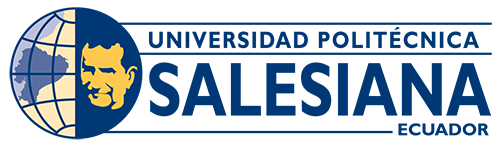

Nombre: David Leon 

In [ ]:
pip install scikit-fuzzy numpy

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperatura = ctrl.Antecedent(np.arange(0, 61, 2), 'temperatura')
humedad = ctrl.Antecedent(np.arange(10, 71, 2), 'humedad')
RPMotor = ctrl.Consequent(np.arange(0, 61, 2), 'RPMotor')

temperatura['bajo'] = fuzz.trapmf(temperatura.universe, [-1, 0, 10, 20])
temperatura['medio'] = fuzz.trapmf(temperatura.universe, [10, 20, 40, 50])
temperatura['alto'] = fuzz.trapmf(temperatura.universe, [40, 50, 60, 61])

humedad['bajo'] = fuzz.trapmf(humedad.universe, [-1,10, 20, 30])
humedad['medio'] = fuzz.trapmf(humedad.universe, [20, 30, 50, 60])
humedad['alto'] = fuzz.trapmf(humedad.universe, [50, 60, 70, 71])

RPMotor['bajo'] = fuzz.trapmf(RPMotor.universe, [-1,0, 10, 20])
RPMotor['medio'] = fuzz.trapmf(RPMotor.universe, [10, 20, 40, 50])
RPMotor['alto'] = fuzz.trapmf(RPMotor.universe, [40, 50, 60, 61])

C:\Users\dilgg\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


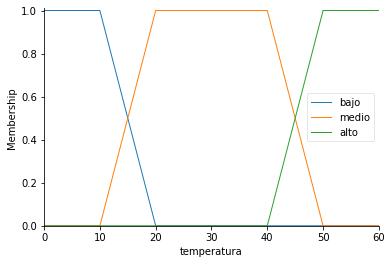

In [2]:
temperatura.view()

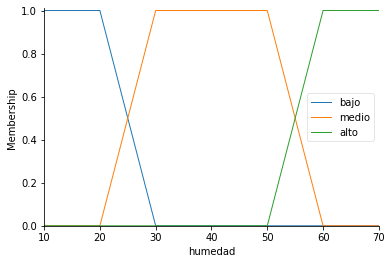

In [3]:
humedad.view()

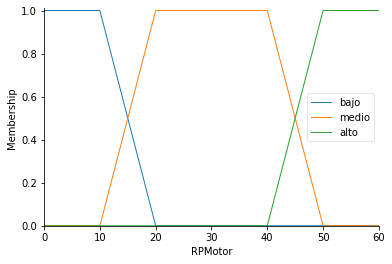

In [4]:
RPMotor.view()

In [5]:

rule1 = ctrl.Rule(temperatura['bajo'] and humedad['alto'], RPMotor['bajo'])
rule2 = ctrl.Rule(temperatura['medio'] and humedad['alto'], RPMotor['medio'])
rule3 = ctrl.Rule(temperatura['alto'] and humedad['alto'], RPMotor['medio'])

rule4 = ctrl.Rule(temperatura['bajo'] and humedad['medio'], RPMotor['bajo'])
rule5 = ctrl.Rule(temperatura['medio'] and humedad['medio'], RPMotor['bajo'])
rule6 = ctrl.Rule(temperatura['alto'] and humedad['medio'], RPMotor['medio'])

rule7 = ctrl.Rule(temperatura['bajo'] and humedad['bajo'], RPMotor['bajo'])
rule8 = ctrl.Rule(temperatura['medio'] and humedad['bajo'],RPMotor['bajo'])
rule9 = ctrl.Rule(temperatura['alto'] and humedad['bajo'], RPMotor['alto'])

rule10 = ctrl.Rule(humedad['alto'] and temperatura['bajo'], RPMotor['bajo'])
rule11 = ctrl.Rule(humedad['alto']and temperatura['medio'], RPMotor['medio'])
rule12 = ctrl.Rule(humedad['alto']and temperatura['alto'], RPMotor['medio'])

rule13 = ctrl.Rule(humedad['medio'] and temperatura['bajo'], RPMotor['bajo'])
rule14 = ctrl.Rule(humedad['medio'] and temperatura['medio'], RPMotor['bajo'])
rule15 = ctrl.Rule(humedad['medio'] and temperatura['alto'], RPMotor['medio'])

rule16 = ctrl.Rule(humedad['bajo'] and temperatura['bajo'], RPMotor['bajo'])
rule17 = ctrl.Rule(humedad['bajo'] and temperatura['medio'],RPMotor['bajo'])
rule18 = ctrl.Rule(humedad['bajo'] and temperatura['alto'], RPMotor['alto'])

In [6]:
rpmotors_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12
                                   , rule13, rule14, rule15, rule16, rule17, rule18])
rpmotors = ctrl.ControlSystemSimulation(rpmotors_ctrl)

29.999999999999986


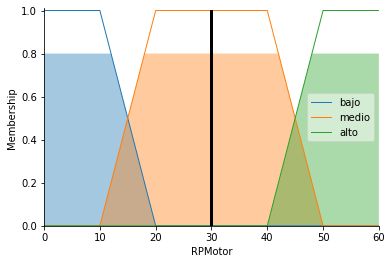

In [7]:
rpmotors.input['temperatura'] = 18
rpmotors.input['humedad'] = 22
rpmotors.compute()
print(rpmotors.output['RPMotor'])
RPMotor.view(sim=rpmotors)

30.000000000000004


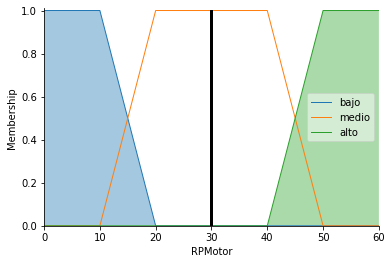

In [8]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk

t=0
s=0

raiz = Tk()

def logica():
    rpmotors.input['temperatura'] = float(temp.get())
    rpmotors.input['humedad'] = float(hum.get())
    rpmotors.compute()
    dif.insert (tk.END, str(rpmotors.output['RPMotor']))
    print(rpmotors.output['RPMotor'])
    RPMotor.view(sim=rpmotors)
    
def recuperar():
        if len(mylist.curselection())!=0:
            t=(mylist.get(mylist.curselection()[0]))
            temp.insert(tk.END, str(t))
        
        if len(mylist1.curselection())!=0:
            h=(mylist1.get(mylist1.curselection()[0]))
            hum.insert(tk.END, str(h)) 
           
    

raiz.geometry('510x400')

raiz.title('Logica Difusa')
Label(raiz, text="Logica Difusa").place(x=210, y=0)


temperatura=Label(raiz,text="TEMPERATURA")
temperatura.place(x=100,y=80)

frame1 = ttk.Frame(raiz, width=80, height=30)
frame1.place(x=80,y=110)


scrollbar = Scrollbar(frame1)
scrollbar.pack( side = RIGHT, fill = Y )

mylist = Listbox(frame1, yscrollcommand = scrollbar.set )
for line in range(101):
    mylist.insert(END, str(line))

mylist.pack( side = LEFT, fill = BOTH )
scrollbar.config( command = mylist.yview )


etomo=Label(raiz,text="HUMEDAD")
etomo.place(x=300,y=80)

frame2 = ttk.Frame(raiz, width=80, height=30)
frame2.place(x=280,y=110)


scrollbar1 = Scrollbar(frame2)
scrollbar1.pack( side = RIGHT, fill = Y )

mylist1 = Listbox(frame2, yscrollcommand = scrollbar1.set )
for line in range(101):
    mylist1.insert(END, str(line))

mylist1.pack( side = LEFT, fill = BOTH )
scrollbar1.config( command = mylist1.yview )


Label(raiz, text="RPM de Ventilador:").place(x=120, y=350)

dif=ttk.Entry(raiz)
dif.place(x=250, y=350)

temp=ttk.Entry(raiz)
temp.place(x=80, y=280)

hum=ttk.Entry(raiz)
hum.place(x=280, y=280)

ttk.Button(raiz, text='Selecionar', command=recuperar).place(x=80, y=310)
ttk.Button(raiz, text='Calcular', command=logica).place(x=200, y=310)
ttk.Button(raiz, text='Limpiar').place(x=340, y=310)

raiz.mainloop()


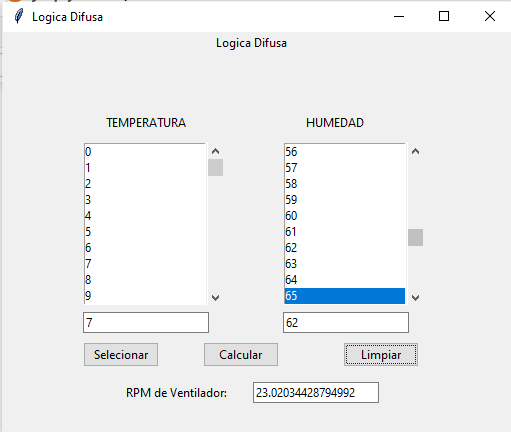